# Análise de Dados com Métodos de Aprendizado de Máquina

## Introdução ao Aprendizado de Máquina

### Daniel Rocha da Silva, Laura Kubitschek Fiorindo

Descrição do trabalho: [Descrição.pdf](https://github.com/danielrochas/ML_Trabalho_1/blob/main/Descrição.pdf)

### Importação de bibliotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error

### Problema 1

Importação e visualização do banco de dados

In [22]:
prostate_data = pd.read_csv('data\prostate.data', sep="\t")
prostate_data

,%,lcavol,lweigh,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
5,6,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0,0.765468
6,7,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468
7,8,0.693147,3.539509,58,1.536867,0,-1.386294,6,0,0.854415
8,9,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319
9,10,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319


Visualização da variável resposta

(array([ 4.,  3.,  7., 17., 17., 26., 14.,  4.,  2.,  3.]),
 array([-0.4307829 ,  0.17058861,  0.77196012,  1.37333163,  1.97470314,
         2.57607465,  3.17744616,  3.77881767,  4.38018918,  4.98156069,
         5.5829322 ]),
 <BarContainer object of 10 artists>)

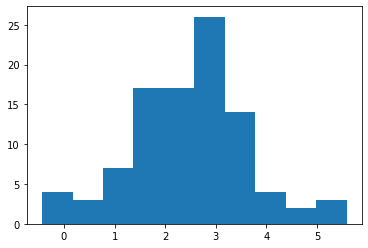

In [23]:
%matplotlib inline

plt.hist(prostate_data["lpsa"])

A partir do histrograma da variável resposta *lpsa* é possível perceber que ela possui distribuição semelhante à Normal, uma vez que possui maior frequência nos valores centrais e menor frequência nas caudas a esquerda e a direita.

Separação entre *features* e *target*

In [24]:
features_prostate = prostate_data.drop(columns = {"%", "lpsa"})
target_prostate = prostate_data["lpsa"]

Padronização das *features*

In [25]:
scaler = StandardScaler()
features_prostate_scaled = scaler.fit_transform(features_prostate)

Separação do conjunto de treinamento (80%) e do conjunto de teste (20%)

In [26]:
features_prostate_train, features_prostate_test, target_prostate_train, target_prostate_test = \
    train_test_split(features_prostate_scaled, target_prostate, test_size = 0.2, random_state = 13)

Ajuste da Regressão Linear e cálculo de medidas de validação para o conjunto teste

In [28]:
lr_prostate = LinearRegression()
lr_prostate.fit(features_prostate_train, target_prostate_train);

# Validação Conjunto Teste
print("R^2 Conjunto Teste: ", round(lr_prostate.score(features_prostate_test, target_prostate_test),2))
target_predicted = lr_prostate.predict(features_prostate_test)
print("EQM Conjunto Teste: ",round(mean_squared_error(target_prostate_test, target_predicted),2))

print("\n")

print("Intercepto", round(lr_prostate.intercept_,2))
for i in range(len(lr_prostate.coef_)):
    print(prostate_data.columns[i+1],":", round(lr_prostate.coef_[i],2))

R^2 Conjunto Teste:  0.64
EQM Conjunto Teste:  0.6


Intercepto 2.47
lcavol : 0.63
lweigh : 0.27
age : -0.12
lbph : 0.05
svi : 0.31
lcp : -0.14
gleason : 0.07
pgg45 : 0.08


A partir dos valores apresentados acima, nota-se que as *features lcavol, lweigh, lbph, svi, gleason* e *pgg45*, por possuírem valores positivos dos coeficientes, contribuiem de maneira positiva para o valor da variável resposta *lpsa*. Ou seja, o aumento do valor dessas variáveis provoca um também aumento no valor da resposta. Vale ressaltar que esse aumento provocado pelas variáveis *lbph, gleason* e *pgg45* é pequeno devido ao pequeno valor do coeficiente, em contrapartida, as variáveis *lcavol, lweigh* e*svi* possuem maior contribuição, por conta do maior valor de seus coeficientes.

Por sua vez, as variáveis *age* e *lcp* possuem contribuição negativa sobre a variável resposta *lpsa*, pois, por terem o valor do coeficiente associado a elas negativo, um aumento no valores dessas covariáveis provoca uma redução no valor da resposta.

O modelo de regressão linear ajustado obteve o valor R-quadrado de 0.64, indicando que 64% da variabilidade da variável resposta está sendo explicada pelo modelo linear ajustado. Já o valor do erro quadrático médio, que deve sempre ser minimizado, para o modelo construído, foi obtido o valor de 0.6.

### Problema 2

In [5]:
card_data = pd.read_csv('data/card.csv', sep=",")
card_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x43,x44,x45,x46,x47,x48,x49,x50,x51,y
0,1,0,0,0.000000,1,0.178571,0,1,0,0,...,0,0.000000,0,1,0,0,0.0000,0,0.000000,1
1,0,1,0,0.110226,0,0.178571,0,1,0,0,...,0,0.000000,0,1,0,0,0.0000,0,0.000000,1
2,1,0,0,0.223008,0,0.129464,1,0,0,0,...,0,0.000000,1,1,0,0,0.0500,0,0.000000,1
3,1,0,0,0.078947,0,0.062500,0,1,0,0,...,0,0.000000,1,1,0,0,0.0560,0,0.169210,1
4,0,1,0,0.530075,0,0.053571,1,0,0,0,...,0,0.000000,1,1,0,0,0.0500,0,0.289757,1
5,1,0,0,0.142857,0,0.142857,1,0,0,0,...,0,0.000000,1,1,0,0,0.0800,0,0.000000,0
6,1,0,0,0.436090,0,0.145893,1,0,0,0,...,0,0.000000,0,1,0,0,0.0540,0,0.401315,1
7,1,0,0,0.436090,0,0.107143,1,0,0,0,...,0,0.000000,0,1,0,0,0.0000,0,0.461157,1
8,1,0,0,0.307068,0,0.187500,1,0,0,0,...,0,0.000000,1,1,0,0,0.1450,0,0.169210,0
9,1,0,0,0.000000,1,0.017857,1,0,0,0,...,0,0.000000,1,0,0,1,0.1600,0,0.000000,1


Visualização da variável resposta

Text(0.5, 0.98, 'Distribuição dos dados da variável resposta (y)')

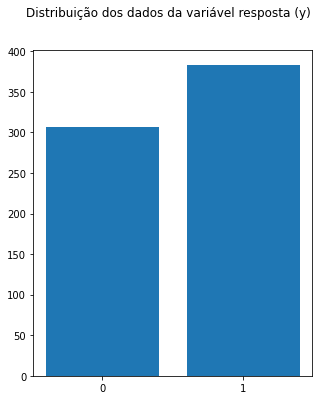

In [6]:
%matplotlib inline


unique, counts = np.unique(card_data["y"], return_counts = True)
unique = ''.join(str(e) for e in unique)
plot_data = dict(zip(unique, counts))

names = list(plot_data.keys())
values = list(plot_data.values())

fig, axs = plt.subplots(1, 1, figsize = (5, 6))
axs.bar(names, values)
fig.suptitle('Distribuição dos dados da variável resposta (y)')

Por meio do gráfico acima, é possível notar que a variável resposta, que é categórica, possui apenas 2 níveis, sendo eles 0 ou 1. Além disso, as duas categorias possuem frequências próximas, indicando que os dados estão, de certa forma, balanceados de acordo com a variável resposta. Nesse problema serão ajustados 3 modelos diferentes para avaliação das métricas, são eles: KNN (k=5), Naive Bayes e Regressão Logística.

Separação entre *features* e *target*

In [7]:
features_card = card_data.drop(columns = {"y"})
target_card = card_data["y"]

Padronização das *features*

In [8]:
scaler = StandardScaler()
features_card_scaled = scaler.fit_transform(features_card)

Aplicando o método 5-vizinhos mais próximos

In [9]:
neigh_card = KNeighborsClassifier(n_neighbors=5)
neigh_card.fit(features_card_scaled, target_card);

# Validação cruzada com método 10-fold
print("Dados normalizados:")
score = cross_val_score(neigh_card, features_card_scaled, target_card, cv = 10, scoring = "accuracy")
print("\n")
print("Acurácia: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_card, features_card_scaled, target_card, cv = 10, scoring = "recall")
print("\n")
print("Recall: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_card, features_card_scaled, target_card, cv = 10, scoring = "precision")
print("\n")
print("Precison: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_card, features_card_scaled, target_card, cv = 10, scoring = "f1")
print("\n")
print("f1: ", score, "Média: ", np.mean(score))

print("\n")
print("Dados originais:")
score = cross_val_score(neigh_card, features_card, target_card, cv = 10, scoring = "accuracy")
print("\n")
print("Acurácia: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_card, features_card, target_card, cv = 10, scoring = "recall")
print("\n")
print("Recall: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_card, features_card, target_card, cv = 10, scoring = "precision")
print("\n")
print("Precison: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_card, features_card, target_card, cv = 10, scoring = "f1")
print("\n")
print("f1: ", score, "Média: ", np.mean(score))

C:\Users\Laura\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:781: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\Laura\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:618: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current

Dados normalizados:


Acurácia:  [0.8        0.77142857 0.78571429 0.73913043 0.82608696 0.84057971
 0.8115942  0.82352941 0.80882353 0.77941176] Média:  0.7986298867373036


Recall:  [0.94871795 0.84615385 0.8974359  0.78947368 0.86842105 0.86842105
 0.86842105 0.89473684 0.84210526 0.84210526] Média:  0.8665991902834008


C:\Users\Laura\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:781: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\Laura\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:781: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch



Precison:  [0.75510204 0.76744186 0.76086957 0.75       0.825      0.84615385
 0.80487805 0.80952381 0.82051282 0.7804878 ] Média:  0.7919969796347847


f1:  [0.84090909 0.80487805 0.82352941 0.76923077 0.84615385 0.85714286
 0.83544304 0.85       0.83116883 0.81012658] Média:  0.8268582475403754


Dados originais:


C:\Users\Laura\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:781: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\Laura\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:781: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch



Acurácia:  [0.77142857 0.81428571 0.84285714 0.8115942  0.92753623 0.88405797
 0.85507246 0.86764706 0.77941176 0.85294118] Média:  0.8406832298136646


Recall:  [0.84615385 0.84615385 0.87179487 0.84210526 0.92105263 0.86842105
 0.92105263 0.94736842 0.78947368 0.89473684] Média:  0.8748313090418354


Precison:  [0.76744186 0.825      0.85       0.82051282 0.94594595 0.91666667
 0.83333333 0.8372093  0.81081081 0.85      ] Média:  0.8456920740060274


f1:  [0.80487805 0.83544304 0.86075949 0.83116883 0.93333333 0.89189189
 0.875      0.88888889 0.8        0.87179487] Média:  0.8593158397503874


C:\Users\Laura\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:781: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\Laura\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:781: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Ao ajustar o modelo de 5 vizinhos mais próximos nos dados padronizados e nos dados originais, observou-se melhor resultado no modelo em que foi utilizado os dados originais. Considerando o modelo com os dados originais, foram obtidas as seguintes métricas de avaliação do modelo:

* acurácia média de 0.84;
* sensibilidade média de 0.87
* precisão média de 0.85
* f1 médio de 0.86

Aplicando o método Naive Bayes

In [10]:
gaussian_nb_card = GaussianNB()
gaussian_nb_card.fit(features_card, target_card);

# Validação cruzada com método 10-fold
score = cross_val_score(gaussian_nb_card, features_card, target_card, cv = 10, scoring = "accuracy")
print("Acurácia: ", score, "Média: ", np.mean(score))
score = cross_val_score(gaussian_nb_card, features_card, target_card, cv = 10, scoring = "recall")
print("Recall: ", score, "Média: ", np.mean(score))
score = cross_val_score(gaussian_nb_card, features_card, target_card, cv = 10, scoring = "precision")
print("Precison: ", score, "Média: ", np.mean(score))
score = cross_val_score(gaussian_nb_card, features_card, target_card, cv = 10, scoring = "f1")
print("f1: ", score, "Média: ", np.mean(score))

Acurácia:  [0.65714286 0.72857143 0.68571429 0.66666667 0.66666667 0.68115942
 0.76811594 0.66176471 0.70588235 0.64705882] Média:  0.6868743149433687
Recall:  [0.97435897 1.         1.         0.86842105 0.97368421 0.94736842
 1.         0.89473684 0.94736842 0.97368421] Média:  0.9579622132253711
Precison:  [0.62295082 0.67241379 0.63934426 0.64705882 0.62711864 0.64285714
 0.7037037  0.64150943 0.66666667 0.61666667] Média:  0.6480289956524313
f1:  [0.76       0.80412371 0.78       0.74157303 0.7628866  0.76595745
 0.82608696 0.74725275 0.7826087  0.75510204] Média:  0.7725591230037712


C:\Users\Laura\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:618: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\Laura\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:428: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

Ao ajustar o modelo naive bayes nos dados originais, foram obtidas seguintes métricas de avaliação do modelo:

* acurácia média de 0.69;
* sensibilidade média de 0.96
* precisão média de 0.64 
* f1 médio de 0.77

Comparando os resultados do modelo KNN e Naive Bayes, observou-se que o primeiro possui métricas de avaliação melhores, por possuir valores maiores dessas medidas, exceto quando se trata da sensibilidade. Nesse caso, como o modelo naive bayes possui alta sensibilidade ele é bom para identificar instâncias positiva quanto a concessão quando ela é realmente positiva. No entanto, nesse caso a precisão do modelo não é tão boa, indicando que ao classificar uma instância como positiva existe uma proporção considerável delas que na realidade é negativa.

Aplicando o método de Regressão Logística

In [11]:
logistic_regression_card = LogisticRegression()
logistic_regression_card.fit(features_card_scaled,target_card)

score = cross_val_score(logistic_regression_card, features_card_scaled, target_card, cv = 10, scoring = "accuracy")
print("Acurácia: ", score, "Média: ", np.mean(score))
score = cross_val_score(logistic_regression_card, features_card_scaled, target_card, cv = 10, scoring = "recall")
print("Recall: ", score, "Média: ", np.mean(score))
score = cross_val_score(logistic_regression_card, features_card_scaled, target_card, cv = 10, scoring = "precision")
print("Precison: ", score, "Média: ", np.mean(score))
score = cross_val_score(logistic_regression_card, features_card_scaled, target_card, cv = 10, scoring = "f1")
print("f1: ", score, "Média: ", np.mean(score))

C:\Users\Laura\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:618: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\Laura\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:428: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

Acurácia:  [0.77142857 0.85714286 0.88571429 0.79710145 0.86956522 0.89855072
 0.89855072 0.86764706 0.85294118 0.88235294] Média:  0.8580995006698331
Recall:  [0.79487179 0.87179487 0.8974359  0.73684211 0.81578947 0.86842105
 0.86842105 0.92105263 0.78947368 0.89473684] Média:  0.8458839406207828


C:\Users\Laura\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:326: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Laura\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:618: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current 

Precison:  [0.79487179 0.87179487 0.8974359  0.875      0.93939394 0.94285714
 0.94285714 0.85365854 0.9375     0.89473684] Média:  0.8950106167901419
f1:  [0.79487179 0.87179487 0.8974359  0.8        0.87323944 0.90410959
 0.90410959 0.88607595 0.85714286 0.89473684] Média:  0.8683516827419684


C:\Users\Laura\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:326: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Laura\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:326: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

Ao ajustar o modelo de regressão logística nos dados originais, foram obtidas seguintes métricas de avaliação do modelo:

* acurácia média de 0.86;
* sensibilidade média de 0.85
* precisão média de 0.90
* f1 médio de 0.87

Comparando o modelo logístico com os demais, ele possui sensibilidade inferior aos modelos KNN e Naive Bayes, no entanto, para as demais métricas, obtever medidas mais elevadas se comparadas com os demais modelos. Nesse caso, cabe ao banco avaliar qual métrica deve ser maximixada em modelo para classificação da concessão de crédito. Uma alta sensibilidade indica que o modelo prevê bem instâncias como positiva quanto a concessão quando ela é realmente positiva. No entanto, também é interessante que a precisão do modelo seja alta, para assim evitar prejuízos ao aumentar a proporção de observações verdadeiramente positivas quando elas foram classificadas positivas. Nesse sentido, o modelo de regressão logística parece ser idea, tendo valores altos para todas métricas de avaliação.

### Problema 3

Importação e visualização do banco de dados

In [2]:
college_data = pd.read_csv("data/College.csv")
college_data

,Inst.Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


Foi feita a troca da variável *Top10perc* pela variável *Elite*, sendo esta uma variável que assume o valor 0 para valores da variável *Top10perc* no intervalo (-1, 50] e 1 para valores no intervalo (50, 101].

In [3]:
college_data["Elite"] = pd.cut(college_data["Top10perc"], bins = (-1,50,101), labels = False)
college_data = college_data.drop(columns = {"Top10perc"})

Foi feita a troca da variável Private para valores inteiros (Yes = 1; No = 0).

In [4]:
college_data["Private"] = np.where(college_data["Private"] == 'Yes', 1, 0)

Visualização da variável resposta

Text(0.5, 0.98, 'Distribuição dos dados da variável resposta (Elite)')

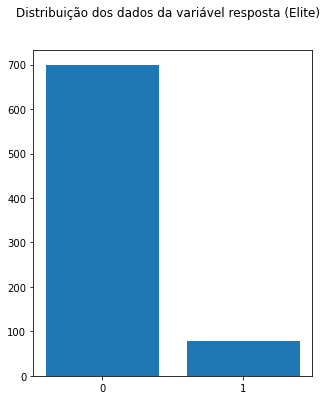

In [5]:
%matplotlib inline


unique, counts = np.unique(college_data["Elite"], return_counts = True)
unique = ''.join(str(e) for e in unique)
plot_data = dict(zip(unique, counts))

names = list(plot_data.keys())
values = list(plot_data.values())

fig, axs = plt.subplots(1, 1, figsize = (5, 6))
axs.bar(names, values)
fig.suptitle('Distribuição dos dados da variável resposta (Elite)')

Com o gráfico acima podemos perceber como a variável resposta apresenta classes (0, 1) com frequência nos dados desbalanceada. Isso deve ser observado nos modelos feitos a seguir.

Separação entre *features* e *target*

In [6]:
features_college = college_data.drop(columns = {"Inst.Name", "Elite"})
target_college = college_data["Elite"]

Foi feita a padronização das *features*

In [7]:
scaler = StandardScaler()
features_college_scaled = scaler.fit_transform(features_college)

Aplicamos o método K-vizinhos

In [8]:
neigh_college = KNeighborsClassifier(n_neighbors=5)
neigh_college.fit(features_college_scaled, target_college);

# Validação cruzada com método 10-fold
print("Dados normalizados:")
score = cross_val_score(neigh_college, features_college_scaled, target_college, cv = 10, scoring = "accuracy")
print("Acurácia: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college_scaled, target_college, cv = 10, scoring = "recall")
print("Recall: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college_scaled, target_college, cv = 10, scoring = "precision")
print("Precison: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college_scaled, target_college, cv = 10, scoring = "f1")
print("f1: ", score, "Média: ", np.mean(score))

print("\n")
print("Dados originais:")
score = cross_val_score(neigh_college, features_college, target_college, cv = 10, scoring = "accuracy")
print("Acurácia: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college, target_college, cv = 10, scoring = "recall")
print("Recall: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college, target_college, cv = 10, scoring = "precision")
print("Precison: ", score, "Média: ", np.mean(score))
score = cross_val_score(neigh_college, features_college, target_college, cv = 10, scoring = "f1")
print("f1: ", score, "Média: ", np.mean(score))

Dados normalizados:
Acurácia:  [0.93589744 0.96153846 0.97435897 0.94871795 0.94871795 0.93589744
 0.91025641 0.8961039  0.97402597 0.93506494] Média:  0.942057942057942
Recall:  [0.75       0.625      0.75       0.5        0.5        0.5
 0.125      0.14285714 0.71428571 0.625     ] Média:  0.5232142857142856
Precison:  [0.66666667 1.         1.         1.         1.         0.8
 1.         0.33333333 1.         0.71428571] Média:  0.8514285714285714
f1:  [0.70588235 0.76923077 0.85714286 0.66666667 0.66666667 0.61538462
 0.22222222 0.2        0.83333333 0.66666667] Média:  0.6203196150254974


Dados originais:
Acurácia:  [0.91025641 0.93589744 0.96153846 0.93589744 0.94871795 0.92307692
 0.8974359  0.90909091 0.92207792 0.94805195] Média:  0.9292041292041292
Recall:  [0.5        0.375      0.625      0.5        0.5        0.375
 0.125      0.14285714 0.57142857 0.625     ] Média:  0.43392857142857144
Precison:  [0.57142857 1.         1.         0.8        1.         0.75
 0.5        

Como podemos ver com os resultados acima conseguimos resultados melhores com a normalização das *features*. 

Podemos perceber também que a medida de acurácia pode ser enganosa já que, neste caso, temos classes bem desbalanceadas. Por isso as medidas *recall*, *precision* e *f1* são mais interessantes para a situação.

Aplicamos Naive Bayes

In [9]:
gaussian_nb_college = GaussianNB()
gaussian_nb_college.fit(features_college_scaled, target_college);

# Validação cruzada com método 10-fold
score = cross_val_score(gaussian_nb_college, features_college, target_college, cv = 10, scoring = "accuracy")
print("Acurácia: ", score, "Média: ", np.mean(score))
score = cross_val_score(gaussian_nb_college, features_college, target_college, cv = 10, scoring = "recall")
print("Recall: ", score, "Média: ", np.mean(score))
score = cross_val_score(gaussian_nb_college, features_college, target_college, cv = 10, scoring = "precision")
print("Precison: ", score, "Média: ", np.mean(score))
score = cross_val_score(gaussian_nb_college, features_college, target_college, cv = 10, scoring = "f1")
print("f1: ", score, "Média: ", np.mean(score))

Acurácia:  [0.92307692 0.97435897 0.94871795 0.91025641 0.97435897 0.94871795
 0.93589744 0.88311688 0.94805195 0.90909091] Média:  0.9355644355644355
Recall:  [0.875      1.         0.875      0.75       0.75       1.
 0.625      0.42857143 0.85714286 1.        ] Média:  0.8160714285714284
Precison:  [0.58333333 0.8        0.7        0.54545455 1.         0.66666667
 0.71428571 0.375      0.66666667 0.53333333] Média:  0.658474025974026
f1:  [0.7        0.88888889 0.77777778 0.63157895 0.85714286 0.8
 0.66666667 0.4        0.75       0.69565217] Média:  0.7167707311757655


Com o *Naive Bayes Gaussiano* não precisamos normalizar as *features*.

Podemos perceber com as métricas apresentadas acima que os resultados obtidos com o método de *Naive Bayes* foram melhores pela métrica *recall*. Esta métrica representa a proporção de classifições 1 feitas pelo modelo dentre todas as verdadeiras classificações 1 nos dados, essa medida, em geral é muito importante e um incremento nela é algo significativo. Já na métrica *precision* tivemos uma piora em relação ao modelo k-vizinhos. Esta métrica representa a proporção de classificações 1 feitas pelo modelo que realmente são classificações 1 nos dados.

### Problema 4

In [10]:
boston_data = pd.read_csv("data/Boston.csv", sep = ";", decimal = ",")
boston_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Visualização da variável resposta

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

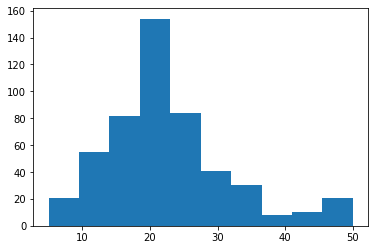

In [11]:
%matplotlib inline

plt.hist(boston_data["medv"])

Com o gráfico acima podemos perceber como a variável resposta apresenta um comportamento semelhante a uma distribuição normal. Ela apresenta um intervalo central mais frequente e tem a frequência reduzida nas caudas.

Separação entre features e target

In [12]:
features_boston = boston_data.drop(columns = {"medv"})
target_boston = boston_data["medv"]

Foi feita a padronização das features

In [13]:
scaler = StandardScaler()
features_boston_scaled = scaler.fit_transform(features_boston)

Separação do conjunto de treinamento (80%) e do conjunto de teste (20%)

In [14]:
features_boston_train, features_boston_test, target_boston_train, target_boston_test = \
    train_test_split(features_boston_scaled, target_boston, test_size = 0.2, random_state = 42)

Aplicamos o método de Regressão Linear e calculamos uma medida de validação no conjunto de teste

In [15]:
lr_boston = LinearRegression()
lr_boston.fit(features_boston_train, target_boston_train);

# Validação
print("R^2: ", lr_boston.score(features_boston_test, target_boston_test))

print("\n")

print("Intercepto", lr_boston.intercept_)
for i in range(len(lr_boston.coef_)):
    print(boston_data.columns[i], lr_boston.coef_[i])

R^2:  0.6687594935356322


Intercepto 22.485268239316902
crim -0.9714942298153109
zn 0.7015556186825168
indus 0.27675211756097745
chas 0.7065315219738251
nox -1.9914304346295502
rm 3.115718363958981
age -0.17706020680903325
dis -3.045770645410489
rad 2.282784712788725
tax -1.792604675752152
ptratio -1.9799535094590697
black 1.126498635557213
lstat -3.628149374371363


Podemos perceber pelos coeficientes apresentados acima que as *features* *crim*, *nox*, *age*, *dis*, *tax*, *ptratio* e *lstat* fornecem uma contribuição negativa para o *target*. Dentre essas *features* podemos destacar *dis* e *lstat* como aquelas que mais influenciam negativamente no preço e este comportamento é aquele esperado para elas.

As *features* *zn*, *indus*, *chas*, *rm*, *rad* e *black* fornecem uma contribuição positiva para o *target*. Dentre essas *features* podemos destacar *rm* como aquela que mais influencia positivamente no preço e este comportamento é aquele esperado para ela, já que esta representa a quantidade de quartos média das residências daquele local.